导入包

In [1]:
import pandas as pd
import re
import math
import pyLDAvis
import pyLDAvis.gensim
import os
import numpy as np
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim import models,corpora
import logging
from gensim.similarities import MatrixSimilarity
import jieba.analyse
import jieba.posseg as jp, jieba
import  jieba
import matplotlib.pyplot as plt
import glob
from PIL import Image,ImageSequence
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei']  
plt.rcParams['axes.unicode_minus'] = False  

e:\python_37\lib\site-packages\sklearn\linear_model\_least_angle.py:34: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
e:\python_37\lib\site-packages\sklearn\linear_model\_least_angle.py:164: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float

In [2]:
file = open("停用词.txt",encoding='utf8') 
stopword = [line.lstrip().rstrip() for line in file.readlines()]
file.close()

e:\python_37\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
#输出主题词
def lda_return_Dataframe(lda_topic):
    totle = []
    for topic in lda_topic:
        top_l = []
        for i in topic[1].split('+'):
            lda_weiht = i.split('*')[0]
            word = i.split('*')[1].replace('"','').replace(' ','')
            top_l.append(word)
            top_l.append(lda_weiht)
        totle.append(top_l)
    return pd.DataFrame(totle) 

#困惑度
def graph_draw_kunhuo(topic, perplexity):  # 做主题数与困惑度的折线图
    x = topic
    y = perplexity
    plt.plot(x, y, color="red", linewidth=2)
    plt.xlabel("主题数")
    plt.ylabel("困惑度")
    plt.savefig("data/困惑度{}.png".format(name))
    plt.show()

#计算困惑度
def perplexity(ldamodel, testset, dictionary, size_dictionary, num_topics):
    prep = 0.0
    prob_doc_sum = 0.0
    topic_word_list = [] 
    for topic_id in range(num_topics):
        topic_word = ldamodel.show_topic(topic_id, size_dictionary)
        dic = {}
        for word, probability in topic_word:
            dic[word] = probability
        topic_word_list.append(dic)  
    doc_topics_ist = []  
    for doc in testset:
        doc_topics_ist.append(ldamodel.get_document_topics(doc, minimum_probability=0))
    testset_word_num = 0
    for i in range(len(testset)):
        prob_doc = 0.0 
        doc = testset[i]
        doc_word_num = 0  
        for word_id, num in dict(doc).items():
            prob_word = 0.0  
            doc_word_num += num
            word = dictionary[word_id]
            for topic_id in range(num_topics):
                prob_topic = doc_topics_ist[i][topic_id][1]
                prob_topic_word = topic_word_list[topic_id][word]
                prob_word += prob_topic * prob_topic_word
            prob_doc += math.log(prob_word) 
        prob_doc_sum += prob_doc
        testset_word_num += doc_word_num
    prep = math.exp(-prob_doc_sum / testset_word_num)
    return prep

#中文数据处理
def set_word(text):
    text = re.sub("[\s+\.\!\/_,$%^*(+\"\']+|[+——！，。？、~@#￥%……&*（）]+|[\d+]|[a-zA-Z+]|⊙|∀|·|【|】", "",text)
    text = text.replace('-','')
    all_text = []
    for  k in jieba.cut(text):
        if ('\u4e00' <= k <= '\u9fa5' and k not in stopword):
            if len(k)>1:
                all_text.append(k)
    return ' ' .join(all_text)
def graph_draw_(topic, perplexity):
    x = topic
    y = perplexity
    plt.plot(x, y, color="red", linewidth=2)
    plt.xlabel("主题数")
    plt.ylabel("一致性")
    plt.savefig("data/一致性{}.png".format(name))
    plt.show()

e:\python_37\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:59: DeprecationWarning: invalid escape sequence \s
<>:59: DeprecationWarning: invalid escape sequence \s
<>:59: DeprecationWarning: invalid escape sequence \s
<ipython-input-10-3ca5f0001206>:59: DeprecationWarning: invalid escape sequence \s
  text = re.sub("[\s+\.\!\/_,$%^*(+\"\']+|[+——！，。？、~@#￥%……&*（）]+|[\d+]|[a-zA-Z+]|⊙|∀|·|【|】", "",text)


In [25]:
import openpyxl

e:\python_37\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
e:\python_37\lib\site-packages\openpyxl\compat\numbers.py:41: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  numpy.float,


In [29]:
file_path = 'Data & Result/sum table/sum table.xls'
import pandas
xls = pandas.ExcelFile(file_path)
sheet_names = xls.sheet_names
sheet_names

e:\python_37\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['UPLARGE', 'DOWNLARGE', 'UPSMALL', 'DOWNSMALL', 'WHOLEMERGE', 'STOCK', '底稿']

In [36]:
for name in sheet_names[0:5]:
    df = pd.read_excel('Data & Result/sum table/sum table.xls',sheet_name=name)
    df['text'] = df['content']
    df['清洗']  = df['text'].apply(lambda x : set_word(str(x)))
    dictionary,corpus,documents = getdic_cou(df['清洗'].values)
    num_topics = 8
    lda = models.LdaModel(corpus=corpus, id2word=dictionary, random_state=1,num_topics=num_topics)
    df_lda = lda_return_Dataframe(lda.print_topics(num_words=30))
    df_lda.to_excel('data/主题词_{}.xlsx'.format(name))
    d = pyLDAvis.gensim.prepare(lda,corpus,dictionary)
    pyLDAvis.save_html(d,'data/四象限图{}.html'.format(name))

e:\python_37\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
df['清洗']  = df['text'].apply(lambda x : set_word(x))

e:\python_37\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\admin\AppData\Local\Temp\jieba.cache
Loading model cost 0.625 seconds.
Prefix dict has been built successfully.


In [6]:
def getdic_cou(values):
    documents =[]
    for i in values:
        documents.append(i.split(' '))
    dictionary=corpora.Dictionary(documents)
    corpus = [dictionary.doc2bow(doc) for doc in documents]
    return dictionary,corpus,documents

e:\python_37\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
dictionary,corpus,documents = getdic_cou(df['清洗'].values)

e:\python_37\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


e:\python_37\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


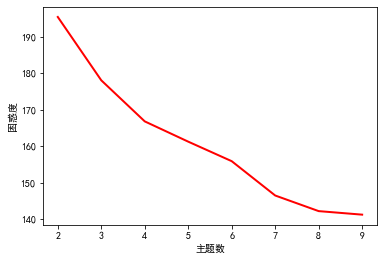

In [8]:
#抽困惑度
a = range(2,10)
p = []
for num_topics in a:
    lda_model = models.LdaModel(corpus=corpus, id2word=dictionary, random_state=1, num_topics=num_topics)
    prep = perplexity(lda_model, corpus, dictionary, len(dictionary.keys()), num_topics)
    p.append(prep)
graph_draw_kunhuo(a,p)

e:\python_37\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


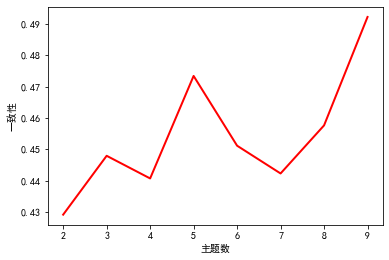

In [9]:
#一致性
coherence_ldas =[]
a_= range(2,10)
for num_topics in a_:
    lda_model = models.LdaModel(corpus=corpus, id2word=dictionary, random_state=1, num_topics=num_topics)
    coherence_model_lda = CoherenceModel(model=lda_model,texts=documents,dictionary=dictionary, coherence='c_v')
    with np.errstate(invalid='ignore'):
        lda_score = coherence_model_lda.get_coherence()
        coherence_ldas.append(lda_score)
graph_draw_(a_,coherence_ldas)

In [11]:
#lda 主题
num_topics = 8
lda = models.LdaModel(corpus=corpus, id2word=dictionary, random_state=1,num_topics=num_topics)
df_lda = lda_return_Dataframe(lda.print_topics(num_words=10))

e:\python_37\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
df_lda.to_excel('主题词_v1.xlsx')

e:\python_37\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [23]:
d = pyLDAvis.gensim.prepare(lda,corpus,dictionary)
pyLDAvis.save_html(d,'四象限图{}.html'.fotmat(name))

e:\python_37\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


AttributeError: 'str' object has no attribute 'fotmat'